In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-cp37-none-any.whl size=16443 sha256=fbd18338b3ef14078076e65caf6e98ad88d4fb564b9bbb5e0e657d804a664f82
  Stored in directory: /root/.cache/pip/wheels/84/27/aa/c46d23c4e8cc72d41283862b1437e0b3ad318417e8ed7d5921
Successfully built efficientnet-pytorch


In [ ]:
from fastai.script import *
import numpy as np
import torch.nn as nn
from torchvision.models import *
import pandas as pd 
from fastai.callbacks import *
from fastprogress import fastprogress
import torch
from fastai.metrics import *
from fastai.vision import *
from fastai.distributed import *
from efficientnet_pytorch import EfficientNet
import warnings
warnings.filterwarnings('ignore')



import torch.nn.functional as F

In [ ]:
!pip install aicrowd-cli

     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 163kB 12.2MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 204kB 15.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:

API_KEY = "ea0d74ffd91c3d24cc9085c0276093d1" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:08<00:00, 90.6MB/s]
test_images.zip: 100% 33.9M/33.9M [00:00<00:00, 64.5MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 2.57MB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 893kB/s]


In [ ]:
!rm -rf data
!mkdir data

In [ ]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, 
                    max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [ ]:
!unzip "./test_images.zip"

Archive:  ./test_images.zip
   creating: test_images/
  inflating: test_images/bfa90c6ac0.jpg  
  inflating: test_images/097c66c0b2.jpg  
  inflating: test_images/a554d1ca8d.jpg  
  inflating: test_images/74a18d3e00.jpg  
  inflating: test_images/9da953d6bc.jpg  
  inflating: test_images/315702b43e.jpg  
  inflating: test_images/20118ce05c.jpg  
  inflating: test_images/b918453fab.jpg  
  inflating: test_images/ec6ab64433.jpg  
  inflating: test_images/4ce545b668.jpg  
  inflating: test_images/2f6f347487.jpg  
  inflating: test_images/59b2ddfc21.jpg  
  inflating: test_images/234a5c97f6.jpg  
  inflating: test_images/b9d0e34a4f.jpg  
  inflating: test_images/8dbf2ab0dd.jpg  
  inflating: test_images/d4c283a3df.jpg  
  inflating: test_images/1570309e87.jpg  
  inflating: test_images/d312dafa4d.jpg  
  inflating: test_images/1da36a3419.jpg  
  inflating: test_images/a0d8cc402a.jpg  
  inflating: test_images/2c7d1a3bec.jpg  
  inflating: test_images/2d201f1150.jpg  
  inflating: test_imag

In [ ]:
!unzip "./train_images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train_images/6c3093ed09.jpg  
  inflating: train_images/d457c6c055.jpg  
  inflating: train_images/29ef2e59a9.jpg  
  inflating: train_images/8a14ef0771.jpg  
  inflating: train_images/8704e89824.jpg  
  inflating: train_images/a713f70b0c.jpg  
  inflating: train_images/b212e3a08f.jpg  
  inflating: train_images/efbd9c3f78.jpg  
  inflating: train_images/1be94502d6.jpg  
  inflating: train_images/95e4dbc52b.jpg  
  inflating: train_images/741b7f61e2.jpg  
  inflating: train_images/0f4e1e287c.jpg  
  inflating: train_images/ed6f280bae.jpg  
  inflating: train_images/489302abdb.jpg  
  inflating: train_images/7c65dfa290.jpg  
  inflating: train_images/6a842c6b01.jpg  
  inflating: train_images/fe7210e4cd.jpg  
  inflating: train_images/c6d0450365.jpg  
  inflating: train_images/ba37f5f354.jpg  
  inflating: train_images/9b1632bc06.jpg  
  inflating: train_images/a2463d8e1c.jpg  
  inflating: train_images/5cfc38ecf4.jpg  
  i

In [ ]:
labels = np.array(pd.read_csv("./train.csv").iloc[:,1])
set_label  = 2
labels = [labels[i].strip() for i in range(len(labels))]
l = len(labels)
print(l)
labels_name = ['Class: %d, %s'%(i,labels[i]) for i in range(10)]
print(labels_name)

9323
['Class: 0, water', 'Class: 1, pizza-margherita-baked', 'Class: 2, broccoli', 'Class: 3, salad-leaf-salad-green', 'Class: 4, egg', 'Class: 5, butter', 'Class: 6, bread-white', 'Class: 7, butter', 'Class: 8, bread-white', 'Class: 9, bread-white']


### We use ImageList and ImageDataBunch because the dataset is not presented in the ImageNet format but rather in a csv-folder format.

In [ ]:
train_data = pd.read_csv("./train.csv")
split_t = []
src = ImageList.from_df(train_data, path="./", folder="train_images").split_by_rand_pct(0.1).label_from_df()
check = [0,3]
src.add_test_folder("test_images")
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0,max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
data = (src.transform(tfms,size=224,resize_method=ResizeMethod.SQUISH).databunch(bs=128).normalize(imagenet_stats))
check[1] = 3
data.num_workers = 12

#### Sample images with their class

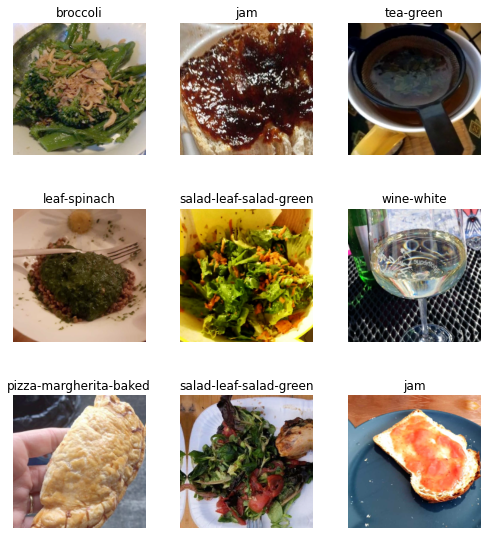

In [ ]:
data.show_batch(rows=3, figsize=(7,8)) 

# Training

epoch,train_loss,valid_loss,accuracy,time
0,4.604655,2.778546,0.356223,02:49
1,3.153647,1.864852,0.508584,02:50
2,2.353931,1.667704,0.549356,02:50
3,1.900259,1.534764,0.554721,02:51
4,1.627247,1.507012,0.563305,02:49
5,1.445637,1.465997,0.574034,02:52
6,1.306805,1.446989,0.578326,02:52
7,1.178829,1.438753,0.591202,02:54
8,1.080097,1.428969,0.591202,02:52
9,1.027786,1.432808,0.592275,02:52


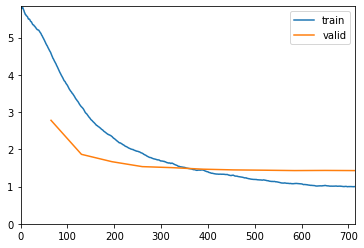

Better model found at epoch 0 with accuracy value: 0.3562231659889221.
Better model found at epoch 1 with accuracy value: 0.508583664894104.
Better model found at epoch 2 with accuracy value: 0.54935622215271.
Better model found at epoch 3 with accuracy value: 0.5547210574150085.
Better model found at epoch 4 with accuracy value: 0.5633047223091125.
Better model found at epoch 5 with accuracy value: 0.5740343332290649.
Better model found at epoch 6 with accuracy value: 0.5783261656761169.
Better model found at epoch 7 with accuracy value: 0.5912017226219177.
Better model found at epoch 9 with accuracy value: 0.5922746658325195.
Better model found at epoch 10 with accuracy value: 0.5933476686477661.


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
model = 3
learn.to_parallel()
learn.fit_one_cycle(11,0.0005, callbacks=[ShowGraph(learn),SaveModelCallback(learn, monitor='accuracy', mode='max', name="trying")])

### Submission code

In [ ]:
test_df = pd.read_csv("./test.csv")
testdf_files = test_df["ImageId"]

check = [0,0]
images_list = []

predictions_list = []

for f in testdf_files:
    check[0] = 1
    images_list.append(f)
    img = open_image("./test_images/"+f)
    img2 = img
    pred_class, pred_idx, outputs = learn.predict(img)
    check[0] =1
    predictions_list.append(pred_class.obj)
    
answer = pd.DataFrame({'ClassName': predictions_list})
ch = 1
answer.to_csv("./submission.csv")

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 9.6/7.9 KB • 494.4 kB/s • 0:00:00
                                               ╭─────────────────────────╮                                               
                                               │ Successfully submitted! │                                               
                                               ╰─────────────────────────╯                                               
                                                     Important links                                                     
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021/submissions/131002              │
│                  │                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/chunin-ex